# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


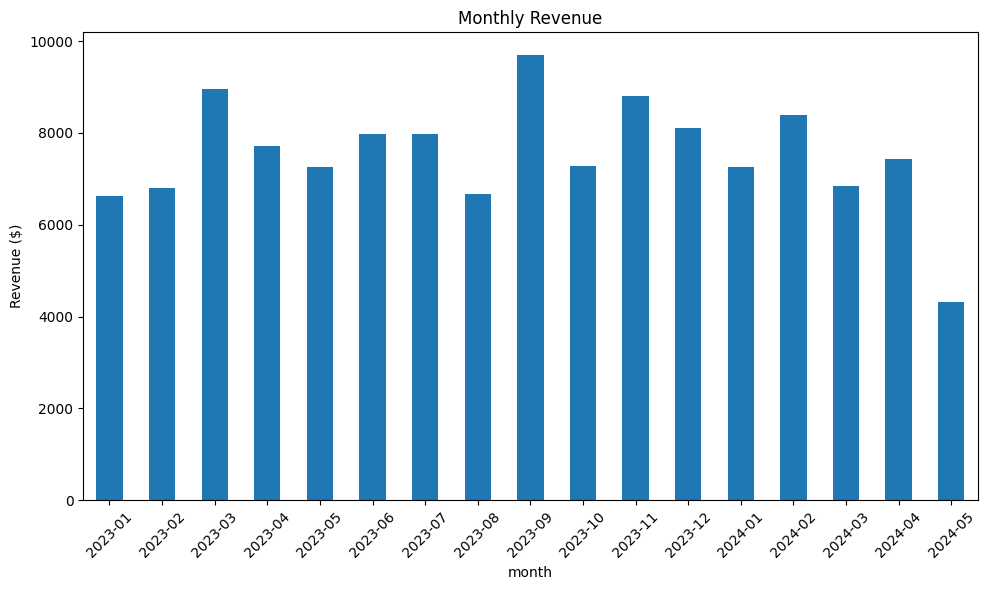

In [3]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

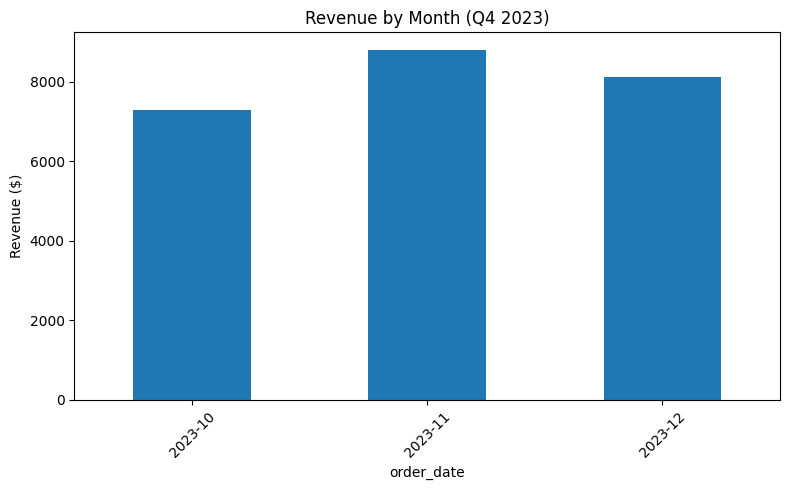

ANSWER: Total Q4 Revenue: 24202.56


In [4]:
# Your code here
# Filter for last quarter (Oct–Dec 2023)
last_quarter = data[(data["order_date"] >= "2023-10-01") & (data["order_date"] <= "2023-12-31")]
revenue_by_month = last_quarter.groupby(last_quarter["order_date"].dt.to_period("M"))["revenue"].sum()

# Plot
revenue_by_month.plot(kind="bar", title="Revenue by Month (Q4 2023)", figsize=(8,5))
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("ANSWER: Total Q4 Revenue:", revenue_by_month.sum())

Revenue in Q4 (Oct–Dec) showed an overall steady growth. From October to November there is a huge growth though there is a slight fall from November to October. This suggests strong end-of-year demand

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

/tmp/ipykernel_2476/367339119.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="viridis")


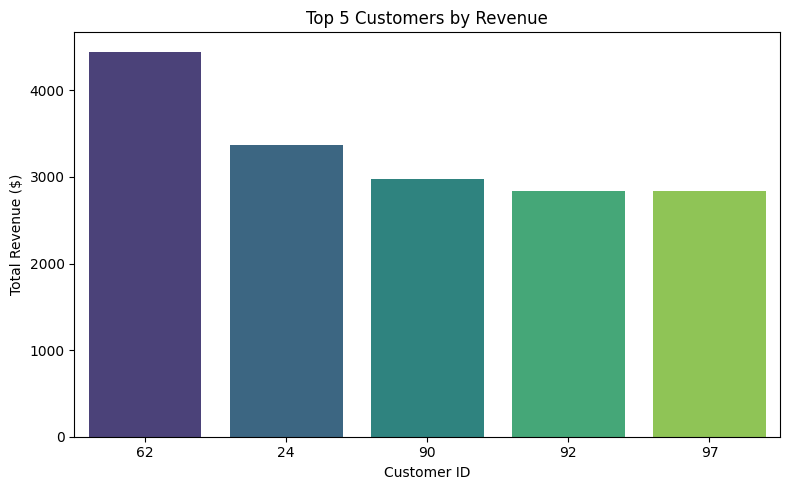

Top 5 Customers by Revenue:
customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


In [5]:
# Top 5 customers by total revenue
top_customers = data.groupby("customer_id")["revenue"].sum().sort_values(ascending=False).head(5)

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="viridis")
plt.title("Top 5 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue ($)")
plt.tight_layout()
plt.show()

print("Top 5 Customers by Revenue:")
print(top_customers)

Interpretation: These are your most valuable customers. Consider loyalty programs or targeted offers.

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

/tmp/ipykernel_2476/606494461.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue_by_segment.index, y=avg_revenue_by_segment.values, palette="coolwarm")


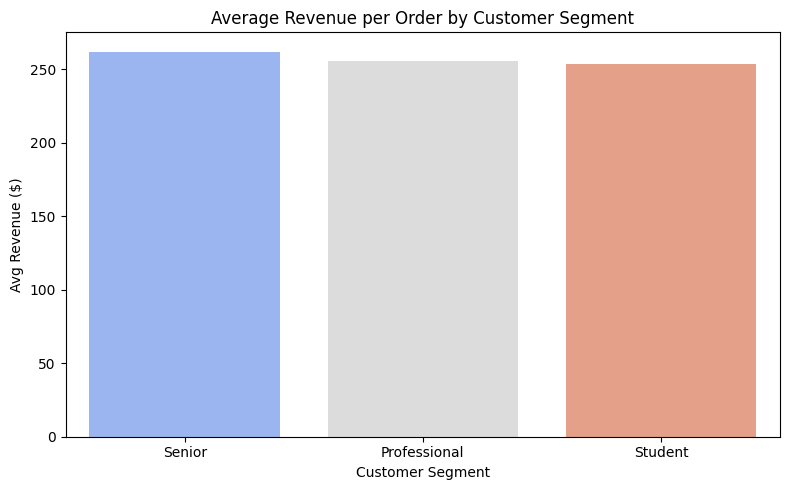

Average Revenue per Order by Segment:
customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64


In [6]:
# Calculate average revenue per order by segment
avg_revenue_by_segment = data.groupby("customer_segment")["revenue"].mean().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=avg_revenue_by_segment.index, y=avg_revenue_by_segment.values, palette="coolwarm")
plt.title("Average Revenue per Order by Customer Segment")
plt.ylabel("Avg Revenue ($)")
plt.xlabel("Customer Segment")
plt.tight_layout()
plt.show()

# Print exact values
print("Average Revenue per Order by Segment:")
print(avg_revenue_by_segment)

Interpretation: Seniors spend the most per order, followed by Professionals. Students spend the least. This indicates that Seniors are the most lucrative segment for premium offerings

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

/tmp/ipykernel_2476/532684903.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_total.index, y=region_total.values, ax=ax[0], palette="Blues_d")
/tmp/ipykernel_2476/532684903.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.index, y=region_avg.values, ax=ax[1], palette="Greens_d")


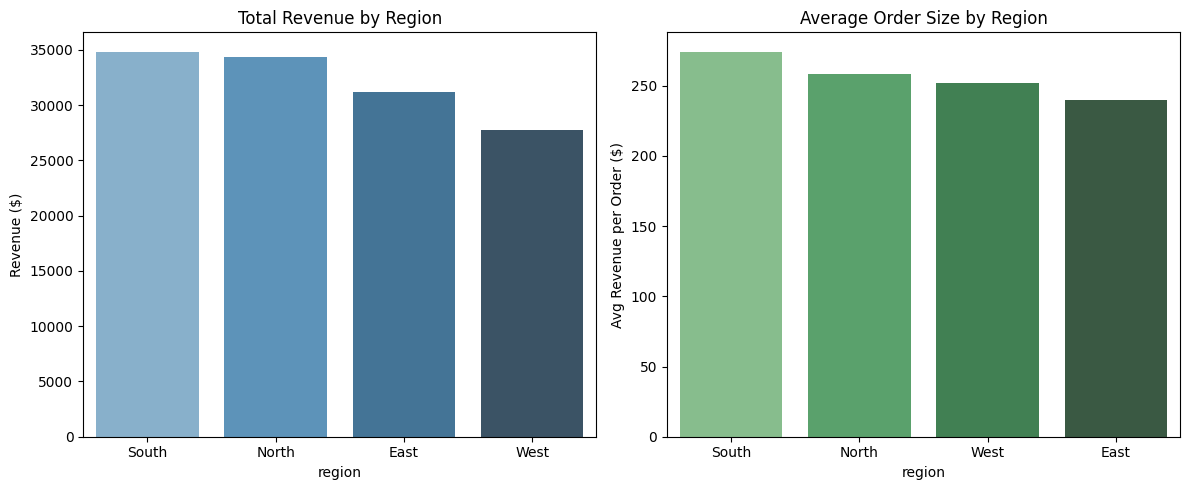

Total Revenue by Region:
region
South    34839.45
North    34351.69
East     31221.80
West     27727.73
Name: revenue, dtype: float64

Average Revenue per Order by Region:
region
South    274.326378
North    258.283383
West     252.070273
East     240.167692
Name: revenue, dtype: float64


In [7]:
# Total revenue by region
region_total = data.groupby("region")["revenue"].sum().sort_values(ascending=False)

# Average revenue per order by region
region_avg = data.groupby("region")["revenue"].mean().sort_values(ascending=False)

# Plot both side by side
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x=region_total.index, y=region_total.values, ax=ax[0], palette="Blues_d")
ax[0].set_title("Total Revenue by Region")
ax[0].set_ylabel("Revenue ($)")

sns.barplot(x=region_avg.index, y=region_avg.values, ax=ax[1], palette="Greens_d")
ax[1].set_title("Average Order Size by Region")
ax[1].set_ylabel("Avg Revenue per Order ($)")

plt.tight_layout()
plt.show()

# exact values
print("Total Revenue by Region:")
print(region_total)
print("\nAverage Revenue per Order by Region:")
print(region_avg)

The South region leads in both total revenue and average order size, making it the most profitable area. North follows closely.

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

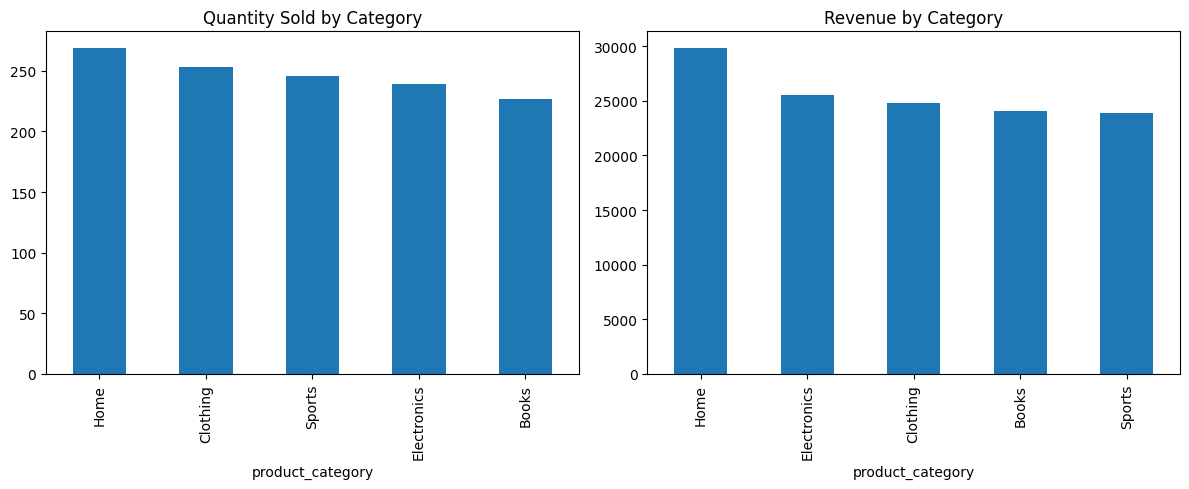

In [8]:
# Your code here
qty_by_category = data.groupby("product_category")["quantity"].sum().sort_values(ascending=False)
rev_by_category = data.groupby("product_category")["revenue"].sum().sort_values(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
qty_by_category.plot(kind="bar", ax=ax[0], title="Quantity Sold by Category")
rev_by_category.plot(kind="bar", ax=ax[1], title="Revenue by Category")
plt.tight_layout()
plt.show()

Home is the most purchased category by quantity and generates the highest revenue. This suggests high-margin products are driving profits

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

/tmp/ipykernel_2476/2526360849.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="discount_status", y="revenue", palette="Set2")


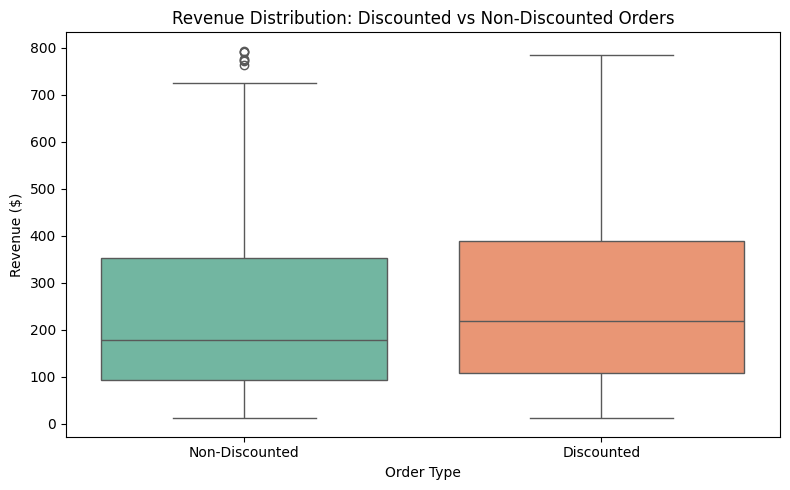

Avg Revenue (Discounted Orders): $263.83
Avg Revenue (Non-Discounted Orders): $248.30


In [9]:
# Your code here
discounted = data[data["discount_applied"] > 0]
non_discounted = data[data["discount_applied"] == 0]
# Create a label for discount status
df["discount_status"] = np.where(df["discount_applied"] > 0, "Discounted", "Non-Discounted")

# Boxplot of revenue by discount status
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="discount_status", y="revenue", palette="Set2")
plt.title("Revenue Distribution: Discounted vs Non-Discounted Orders")
plt.ylabel("Revenue ($)")
plt.xlabel("Order Type")
plt.tight_layout()
plt.show()
avg_rev_discounted = discounted["revenue"].mean()
avg_rev_non_discounted = non_discounted["revenue"].mean()

print(f"Avg Revenue (Discounted Orders): ${avg_rev_discounted:.2f}")
print(f"Avg Revenue (Non-Discounted Orders): ${avg_rev_non_discounted:.2f}")

Interpretation: Compares revenue impact of discounts — helps assess if promotions are profitable
iscounts are driving volume without hurting revenue


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

Payment Method Usage (%):
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64

Average Revenue by Payment Method:
payment_method
Debit Card     275.980650
Credit Card    257.444234
Gift Card      254.362500
PayPal         236.071034
Name: revenue, dtype: float64


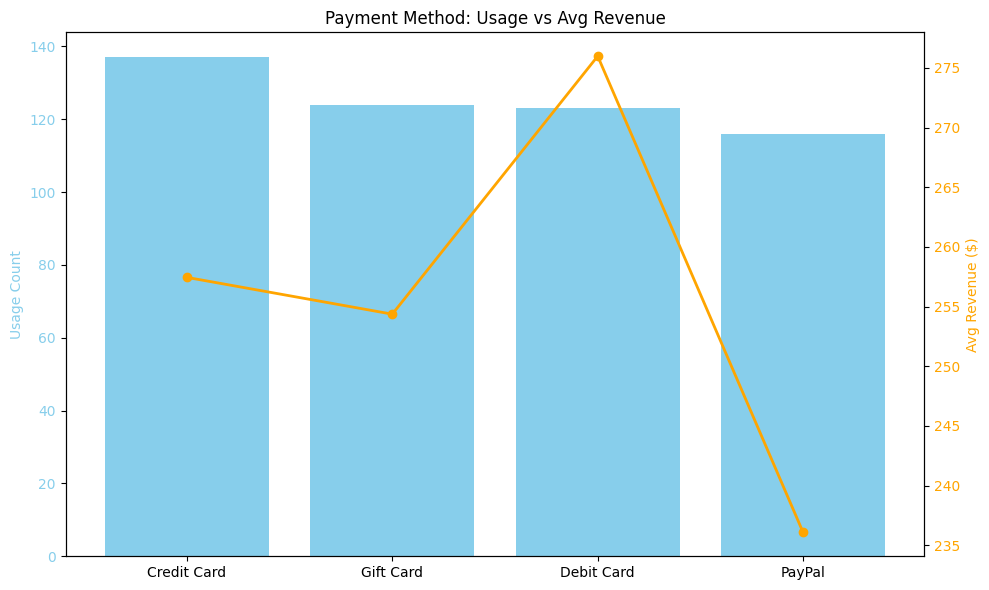

In [10]:
# Your code here
method_counts = data["payment_method"].value_counts(normalize=True) * 100
avg_rev_by_method = data.groupby("payment_method")["revenue"].mean().sort_values(ascending=False)

print("Payment Method Usage (%):")
print(method_counts)
print("\nAverage Revenue by Payment Method:")
print(avg_rev_by_method)

# Aggregate metrics
method_usage = df["payment_method"].value_counts()
avg_revenue = df.groupby("payment_method")["revenue"].mean()

# Align both metrics
combined = pd.DataFrame({
    "Usage Count": method_usage,
    "Avg Revenue": avg_revenue
}).sort_values("Usage Count", ascending=False)

# Plot
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart: usage count
color1 = "skyblue"
ax1.bar(combined.index, combined["Usage Count"], color=color1)
ax1.set_ylabel("Usage Count", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_title("Payment Method: Usage vs Avg Revenue")

# Line chart: average revenue
ax2 = ax1.twinx()
color2 = "orange"
ax2.plot(combined.index, combined["Avg Revenue"], color=color2, marker="o", linewidth=2)
ax2.set_ylabel("Avg Revenue ($)", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.tight_layout()
plt.show()

Interpretation: Shows customer preferences and spending patterns by payment method. Credit cards generate more revenue while credit cards are the most popular.


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

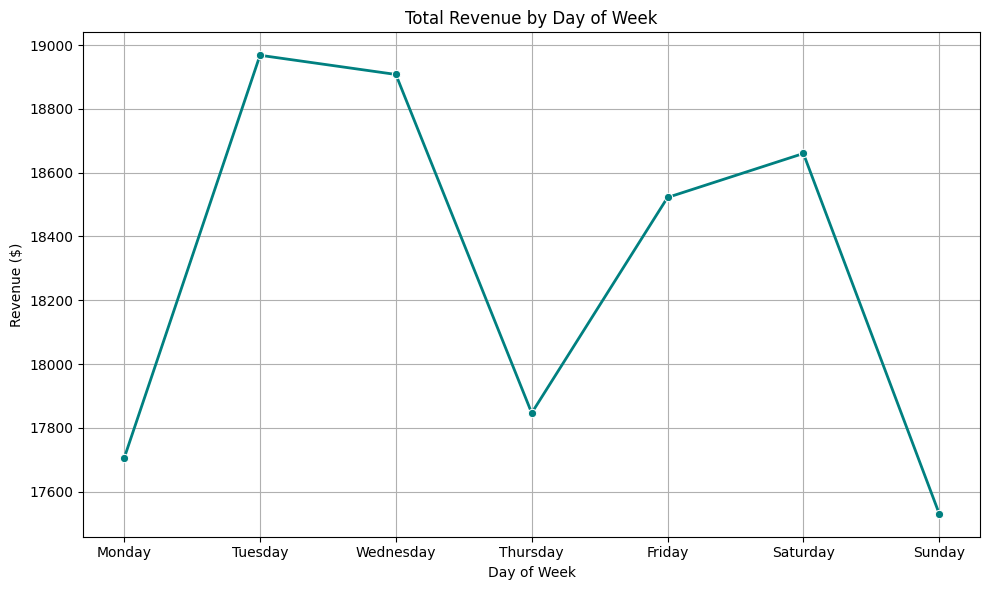

Revenue by Day of Week:
order_day
Monday       17704.70
Tuesday      18968.41
Wednesday    18908.21
Thursday     17846.36
Friday       18522.40
Saturday     18660.35
Sunday       17530.24
Name: revenue, dtype: float64


In [11]:
# Convert order date to day of week
df["order_day"] = pd.to_datetime(df["order_date"]).dt.day_name()

# Aggregate revenue by day
revenue_by_day = df.groupby("order_day")["revenue"].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# Visualization
plt.figure(figsize=(10,6))
sns.lineplot(x=revenue_by_day.index, y=revenue_by_day.values, marker="o", linewidth=2, color="teal")
plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print exact values
print("Revenue by Day of Week:")
print(revenue_by_day)

Weekdays(especially Tuesday and Wednesday) tend to be more busier than weekends.

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

Estimated Total Profit: $25628.13


/tmp/ipykernel_2476/3105903922.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_region.index, y=profit_by_region.values, palette="magma")


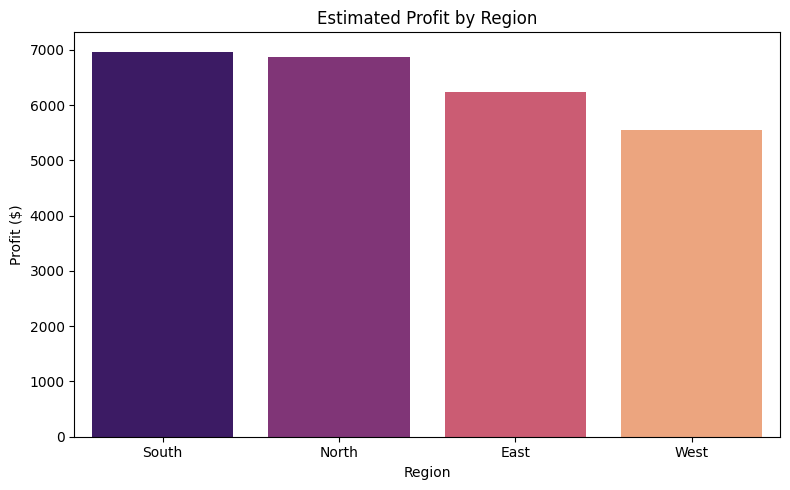

Profit by Region:
region
South    6967.890
North    6870.338
East     6244.360
West     5545.546
Name: profit, dtype: float64


In [12]:
# Estimate profit as 20% of revenue
data["profit"] = data["revenue"] * 0.20

# Total profit
total_profit = data["profit"].sum()
print(f"Estimated Total Profit: ${total_profit:.2f}")

# Profit by region
profit_by_region = data.groupby("region")["profit"].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values, palette="magma")
plt.title("Estimated Profit by Region")
plt.ylabel("Profit ($)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

# Print exact values
print("Profit by Region:")
print(profit_by_region)

Interpretation: Estimated total profit is strong, with the South region contributing the most. This reinforces its strategic importance for future investment.

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**
Recommendation: Focus marketing efforts on the Seniors segment, which has the highest average order value (262.133925). Promote Home categories in the South region, which leads in both revenue and profitability because Homes are most purchased by quantity and generate highest revenue of approximately 270 and the South region leads in profitability with 6967.890. Consider targeted weekday campaigns and strategic discounts, as weekdays show higher traffic and discounted items show high average revenue.


---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.